# COGS 108 - EDA Checkpoint

# Names

- Alexandro Merida Silva
- Adam Rolander
- Alyssa Le
- Enrique Aranda
- Hikari Gregersen

# Research Question

Is there a relationship between the quality of parent-child relations (ie, time spent breastfeeding, self-reported level of care from parents, involvement in hobbies) and adult mental health diagnoses or self-reported well-being, as collected by surveys?

## Background and Prior Work

Providing support is one of the most important responsibilities that a parent takes up when introducing a child into their lives. This parental involvement is what helps a child thrive in their early years and is the standard for a healthy household. The American Psychological Association surveyed this relationship and found that poor mental health is strongly linked to a lack of parental support. Their findings support the notion that parent support is vital as it sets the foundation for healthy self-esteem and perspective on love, and without it, the long-term effects could lead to depressive and melancholy symptoms<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1). We can explore this more in-depth in our project, as we will have an eye on the correlation between care from parents and their reported mental health. 

In an era of increasingly common teen suicides, parental support could be a key factor in lowering these numbers<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). In an article from the University of Maryland College of Education, the article covers the importance of a parent’s role in supporting their adolescent children as they face an overwhelming increase in bullying. Their data showed that parental involvement through the middle school years proved to benefit their academic achievement and socioemotional health, which is typically when parents start distancing themselves from their child’s academics<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). This correlation shown by their research can help us look into their general well-being and time spent with their parents, and see if we see the same correlation. 

Prior works have shown that parental involvement does not go unnoticed, and it leads to a positive impact on their child’s well-being. A small step can go a long way for a child, and their notion of great parenting will influence their parenting styles in the future, benefiting the next generation of children. Our objective as a group is to go deeper into this hereditary cascade and discover the long-term effects of parent involvement on their children’s mental health.

**References:**
1. <a name="cite_note-1"></a> [^](#cite_ref-1) American Psychological Association. (2004, March). Parental Support and Mental Health. https://www.apa.org/news/press/releases/2004/03/parental-support 
2. <a name="cite_note-2"></a> [^](#cite_ref-2)University of Maryland College of Education. (2019, March 29). Parental Involvement as a Protective Factor for Adolescent Mental Health. https://education.umd.edu/news/03-29-19-parental-involvement-%E2%80%9Cprotective-factor%E2%80%9D-mental-health 


# Hypothesis


We predict that individuals who experienced greater parental support during childhood will report better adult mental health outcomes. This includes lower rates of diagnosed depression, fewer depressive symptoms, and less psychological counseling usage. Our hypothesis is grounded in both prior research and the structure of our dataset, and is explored across the following dimensions:


- **Children with high perceived parental warmth and care**

    Research shows that individuals with lower emotional support from parents during childhood reported significantly more depressive symptoms and chronic conditions in adulthood<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1). We hypothesize that individuals who reported higher levels of parental warmth and involvement measured through variables such as parents_care (H1PR3), mom_warmth (H1PF1), and mother_close (H4WP24) will show lower levels of depressive symptoms and less need for psychological counseling in adulthood.


- **Individuals nurtured through early caregiving behaviors**

    It is also researched that early support contributes to long-term psychosocial resources like self-esteem and emotional regulation<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1). We expect that those who were breastfed longer (breastfed_duration (PC20)) or engaged in structured, supportive childhood activities (hobby_time (H1DA2)) will experience better adult mental health outcomes.

- **Those exposed to early adversity**

    Wang et al. (2019)<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) found that perceived parental involvement buffered the negative effects of victimization on middle school students’ mental health. Students who felt supported by parents reported fewer mental health difficulties and suicidal thoughts, even when exposed to bullying. Based on this, we hypothesize that individuals who experienced early-life adversity such as being jumped (jumped (H1FV6)) or witnessing violence (witness_violence (H1FV1)) will report poorer mental health outcomes unless mitigated by strong early parental support.

- **Adults with diagnosed mental health issues or emotional counseling history**

    We expect a negative association between early parental support and adult mental health issues, including diagnosed depression (depression (H4ID5H)), emotional distress (depress_feel (H1FS6)), and use of counseling services (counseling (H1HS3)). This prediction is grounded in life course research suggesting that early emotional environments shape long-term psychological health.

# Data

## Data overview

  - Dataset Name: National Longitudinal Study of Adolescent to Adult Health (Add Health), 1994-2008 [Public Use]
  - Link to the dataset: https://www.icpsr.umich.edu/web/ICPSR/studies/21600/variables
  - Number of observations: 5114 originally, 1715 after cleaning
  - Number of variables: 3713 originally, 30 after cleaning

This dataset was collected by the Carolina Population Center with in-school questionnaires and in-home interviews, collecting various information, from health to personal relationships and school reports. This particular dataset includes data from 1994-2008 over a series of five waves that were conducted throughout the respondents’ transition into adulthood. We decided to use data from waves 1 and 4 that consisted of the most comprehensive survey questions and were reported in 1994-96 (middle-high school age) and 2008 (mid 20s-30s), respectively. Our project will look at the variables relevant to childhood from the survey, such as the amount of time spent being breastfed, closeness to mother and father, and general attitude towards family life, as well as variables relevant to well-being as an adult, including considering and attempting suicide, feelings of depression, and seeking counseling. These variables are numeric, as the observations were often reported on a scale of 1-10 or were the specific number of times the participant experienced a condition. We downloaded the dataset locally, and it is already in tidy format, but we renamed columns to more accurately reflect the variables they display. Also, since not every respondent responded to all of our desired variables, we decided to drop any ‘legitimate skips’ or times where the respondents refused to or didn’t know the answer to a question we asked, as part of the cleaning process. 

## Dataset (Add Health)

In [ ]:
# Setup - importing numpy, pandas, seaborn, matplotlib, and statsmodels
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.formula.api as smf
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Read in DS0001 & DS0022 csv's

df_set1 = pd.read_csv("ICPSR_21600/DS0001/21600-0001-Data.tsv", sep="\t")

df_set22 = pd.read_csv("ICPSR_21600/DS0022/21600-0022-Data.tsv", sep="\t")

In [5]:
# Merge on AID (participant identifier), inner so non-respondents aren't included
merged_df = pd.merge(df_set1, df_set22, on="AID", how="inner", suffixes=("_wave1", "_wave4"))

print("Merged shape:", merged_df.shape)
merged_df.head()

Merged shape: (5114, 3713)


,AID,IMONTH,IDAY,IYEAR,SCH_YR,BIO_SEX,VERSION,SMP01,SMP03,H1GI1M,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,57101310,5,5,95,1,2,1,1,0,11,...,0,0,0,0,0,0,0,0,2,1
1,57103869,7,14,95,0,1,4,1,0,1,...,0,0,0,0,0,0,0,0,4,1
2,57109625,6,7,95,1,1,3,1,0,3,...,,,,,,,,,,
3,57111071,8,3,95,0,1,5,1,0,6,...,0,0,0,0,0,0,0,0,1,2
4,57113943,5,20,95,1,1,3,1,0,1,...,0,0,0,0,0,0,0,0,5,3


In [6]:
# Get a subset of the variables we want to study (30 out of 3713 variables)
sub_df = merged_df[['H1PR3', 'H1DS7', 'PC20', 'H1DA2', 'H1DA7', 'H1PR1', 'H1PR5', 'H1FV1', 'H1FV6', 'H4EC7', 
                    'H4ID5H', 'H1HS3', 'H1FS6', 'H1PF5', 'H1SU1', 'H4SE1', 'H4SE2', 'H4ED9', 'H4LM28', 
                    'H4ED8', 'H4MA1', 'H4GH7', 'H1ED11', 'H1ED12', 'H1ED13', 'H1ED14', 'H4CJ1', 'H4WP38', 
                    'H1PF1', 'H4WP24']]
sub_df.head()

,H1PR3,H1DS7,PC20,H1DA2,H1DA7,H1PR1,H1PR5,H1FV1,H1FV6,H4EC7,...,H4MA1,H4GH7,H1ED11,H1ED12,H1ED13,H1ED14,H4CJ1,H4WP38,H1PF1,H4WP24
0,5,0,,0,3,5,4,0,0,4,...,6,5,2,5,3,3,0,7,1,7
1,5,0,7,1,2,5,1,0,1,1,...,1,2,3,4,3,2,1,5,2,5
2,5,0,7,0,3,5,3,0,0,3,...,6,3,3,3,4,4,1,4,2,4
3,5,0,7,1,2,5,4,0,0,3,...,6,4,2,3,2,3,0,5,1,5
4,5,0,1,2,2,5,4,0,0,1,...,6,5,3,3,2,4,1,5,1,5


In [7]:
# New variables to make the data more understandable (notated with _c if variable comes from childhood & _a if adult factor)
new_col_names = {'H1PR3':'parents_care_c', 'H1DS7':'run_home_c', 'PC20':'breastfed_duration_c', 'H1DA2':'hobby_time_c',
                 'H1DA7':'friend_time_c', 'H1PR1':'mother_care_c', 'H1PR5':'fam_understanding_c',
                 'H1FV1':'witness_violence_c', 'H1FV6':'jumped_c', 'H4EC7':'assets_value_a', 'H4ID5H':'depression_a',
                 'H1HS3':'counseling_c', 'H1ED11':'English_c', 'H1ED12':'Math_c', 'H1ED13':'History_c', 'H1ED14':'Science_c',
                 'H1FS6':'depress_feel_c', 'H1PF5':'mother_satisfied_c', 'H1SU1':'consider_suicide_youth_c', 
                 'H4SE1':'consider_suicide_adult_a', 'H4SE2':'attempt_suicide_adult_a', 'H4ED9':'edu_exp_a',
                 'H4LM28':'respon_interfer_a', 'H4CJ1':'arrest_i_a', 'H4ED8':'desired_edu_a', 'H4MA1':'feels_18th_a',
                 'H4GH7':'feel_weight_a', 'H4WP38':'father_close_a', 'H4WP24':'mother_close_a', 'H1PF1':'mom_warmth_c',}
sub_df = sub_df.rename(new_col_names, axis='columns')
sub_df.head()

,parents_care_c,run_home_c,breastfed_duration_c,hobby_time_c,friend_time_c,mother_care_c,fam_understanding_c,witness_violence_c,jumped_c,assets_value_a,...,feels_18th_a,feel_weight_a,English_c,Math_c,History_c,Science_c,arrest_i_a,father_close_a,mom_warmth_c,mother_close_a
0,5,0,,0,3,5,4,0,0,4,...,6,5,2,5,3,3,0,7,1,7
1,5,0,7,1,2,5,1,0,1,1,...,1,2,3,4,3,2,1,5,2,5
2,5,0,7,0,3,5,3,0,0,3,...,6,3,3,3,4,4,1,4,2,4
3,5,0,7,1,2,5,4,0,0,3,...,6,4,2,3,2,3,0,5,1,5
4,5,0,1,2,2,5,4,0,0,1,...,6,5,3,3,2,4,1,5,1,5


In [8]:
print('Data types in sub_df:')
sub_df.dtypes

Data types in sub_df:


parents_care_c               int64
run_home_c                   int64
breastfed_duration_c        object
hobby_time_c                 int64
friend_time_c                int64
mother_care_c                int64
fam_understanding_c          int64
witness_violence_c           int64
jumped_c                     int64
assets_value_a               int64
depression_a                 int64
counseling_c                 int64
depress_feel_c               int64
mother_satisfied_c           int64
consider_suicide_youth_c     int64
consider_suicide_adult_a    object
attempt_suicide_adult_a     object
edu_exp_a                    int64
respon_interfer_a           object
desired_edu_a                int64
feels_18th_a                 int64
feel_weight_a                int64
English_c                    int64
Math_c                       int64
History_c                    int64
Science_c                    int64
arrest_i_a                   int64
father_close_a               int64
mom_warmth_c        

In [9]:
# remove spaces before converting the object data type columns to integers to avoid errors
sub_df = sub_df[~sub_df.consider_suicide_adult_a.isin([' '])]
sub_df = sub_df[~sub_df.breastfed_duration_c.isin([' '])]

sub_df['consider_suicide_adult_a'] = sub_df['consider_suicide_adult_a'].astype(int)
sub_df['breastfed_duration_c'] = sub_df['breastfed_duration_c'].astype(int)
sub_df['attempt_suicide_adult_a'] = sub_df['attempt_suicide_adult_a'].astype(int)
sub_df['respon_interfer_a'] = sub_df['respon_interfer_a'].astype(int)

In [10]:
# Let's now remove all of the decline to answer/ unknown answers (number codes vary per variable)
sub_df = sub_df[~sub_df.parents_care_c.isin([6, 96, 98])]
sub_df = sub_df[~sub_df.run_home_c.isin([6, 8, 9])]
sub_df = sub_df[~sub_df.breastfed_duration_c.isin([96, 98])]
sub_df = sub_df[~sub_df.mom_warmth_c.isin([6, 7, 8])]
sub_df = sub_df[~sub_df.hobby_time_c.isin([6, 8])]
sub_df = sub_df[~sub_df.friend_time_c.isin([6, 8])]
sub_df = sub_df[~sub_df.fam_understanding_c.isin([6, 96, 98])]
sub_df = sub_df[~sub_df.witness_violence_c.isin([9])]
sub_df = sub_df[~sub_df.jumped_c.isin([9])]
sub_df = sub_df[~sub_df.assets_value_a.isin([96, 98])]
sub_df = sub_df[~sub_df.mother_close_a.isin([7])]
sub_df = sub_df[~sub_df.father_close_a.isin([7, 8])]
sub_df = sub_df[~sub_df.depression_a.isin([6])]
sub_df = sub_df[~sub_df.English_c.isin([5, 6, 96, 97, 98])]
sub_df = sub_df[~sub_df.Math_c.isin([5, 6, 96, 97, 98])]
sub_df = sub_df[~sub_df.History_c.isin([5, 6, 96, 97, 98])]
sub_df = sub_df[~sub_df.Science_c.isin([5, 6, 96, 97, 98])]
sub_df = sub_df[~sub_df.counseling_c.isin([6, 8])]
sub_df = sub_df[~sub_df.mother_satisfied_c.isin([6, 7, 8, 9])]
sub_df = sub_df[~sub_df.consider_suicide_youth_c.isin([6, 8, 9])]
sub_df = sub_df[~sub_df.edu_exp_a.isin([96, 97, 98])]
sub_df = sub_df[~sub_df.respon_interfer_a.isin([6, 96, 98])]
sub_df = sub_df[~sub_df.desired_edu_a.isin([6, 8])]
sub_df = sub_df[~sub_df.feels_18th_a.isin([96, 98])]
sub_df = sub_df[~sub_df.feel_weight_a.isin([6, 8])]
sub_df = sub_df[~sub_df.consider_suicide_adult_a.isin([6, 7, 8])]
sub_df = sub_df[~sub_df.attempt_suicide_adult_a.isin([6, 7, 8])]

sub_df = sub_df.reset_index(drop=True)
sub_df.head()

,parents_care_c,run_home_c,breastfed_duration_c,hobby_time_c,friend_time_c,mother_care_c,fam_understanding_c,witness_violence_c,jumped_c,assets_value_a,...,feels_18th_a,feel_weight_a,English_c,Math_c,History_c,Science_c,arrest_i_a,father_close_a,mom_warmth_c,mother_close_a
0,5,0,7,1,2,5,1,0,1,1,...,1,2,3,4,3,2,1,5,2,5
1,5,0,7,0,3,5,3,0,0,3,...,6,3,3,3,4,4,1,4,2,4
2,5,0,1,2,2,5,4,0,0,1,...,6,5,3,3,2,4,1,5,1,5
3,5,0,2,0,1,5,4,0,0,4,...,6,3,1,1,2,1,0,4,1,5
4,5,0,3,1,1,5,3,0,0,3,...,3,4,2,3,1,3,1,3,1,2


In [11]:
# Check how many variables are not integers! (should be 0)
int_columns = sub_df.select_dtypes(exclude=['int64', 'Int64']).columns
print("Number of non-integer variables:", len(int_columns.tolist()))
print("Final cleaned shape:", sub_df.shape)

Number of non-integer variables: 0
Final cleaned shape: (1715, 30)


# Results

## Exploratory Data Analysis

### Data Visualization

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [12]:
childhood_vars = sub_df[[col for col in sub_df.columns if col.endswith('_c')]]
adult_vars = sub_df[[col for col in sub_df.columns if col.endswith('_a')]]
childhood_vars.shape, adult_vars.shape

((1715, 18), (1715, 12))

Text(0.5, 1.02, 'Self-worth & Health')

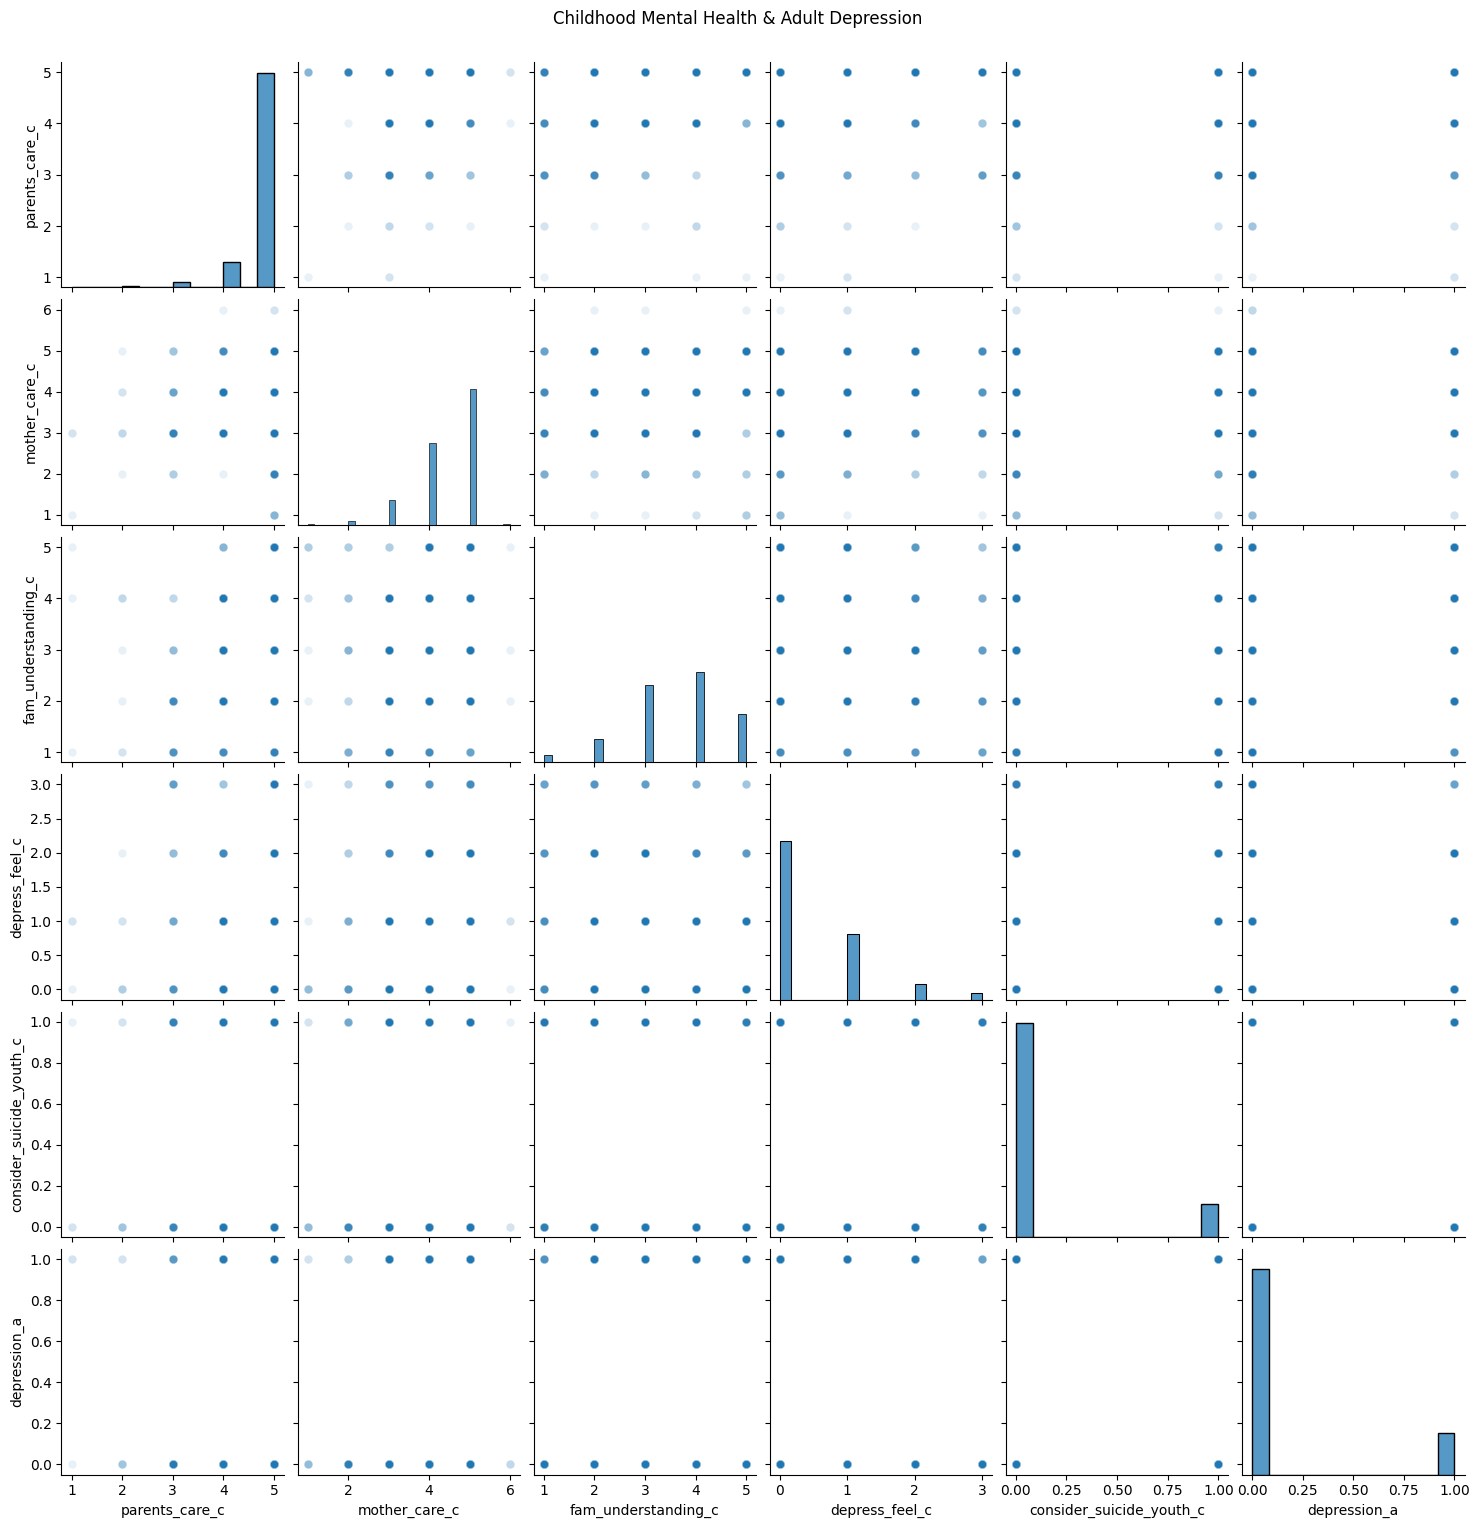

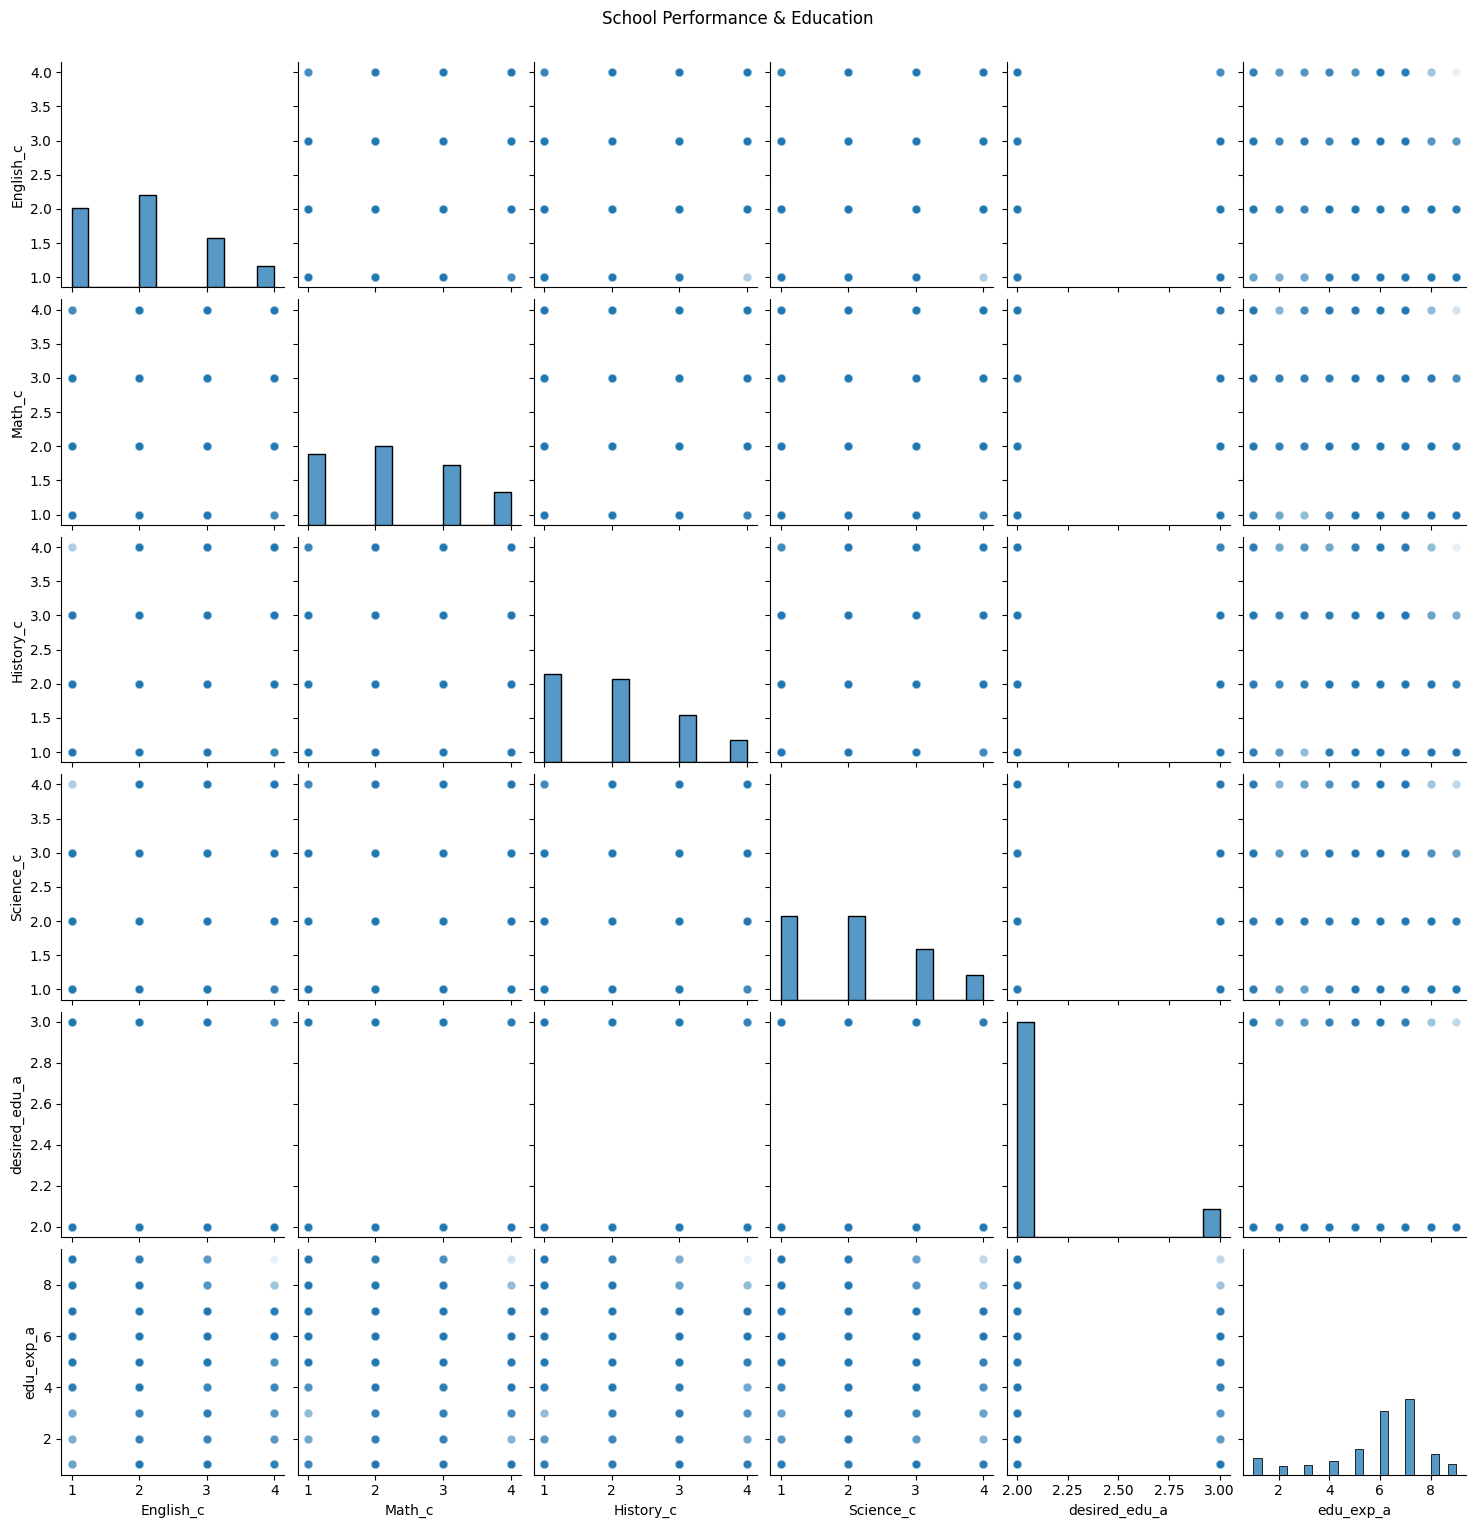

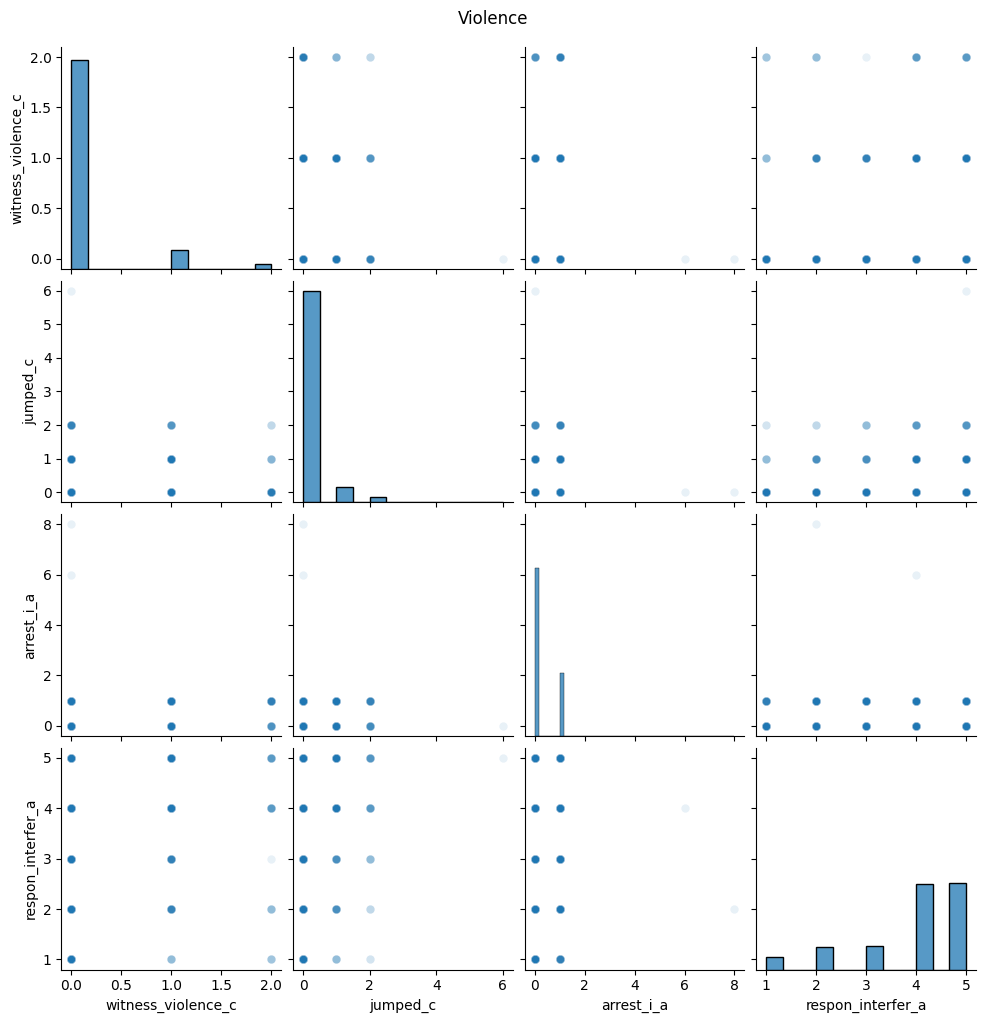

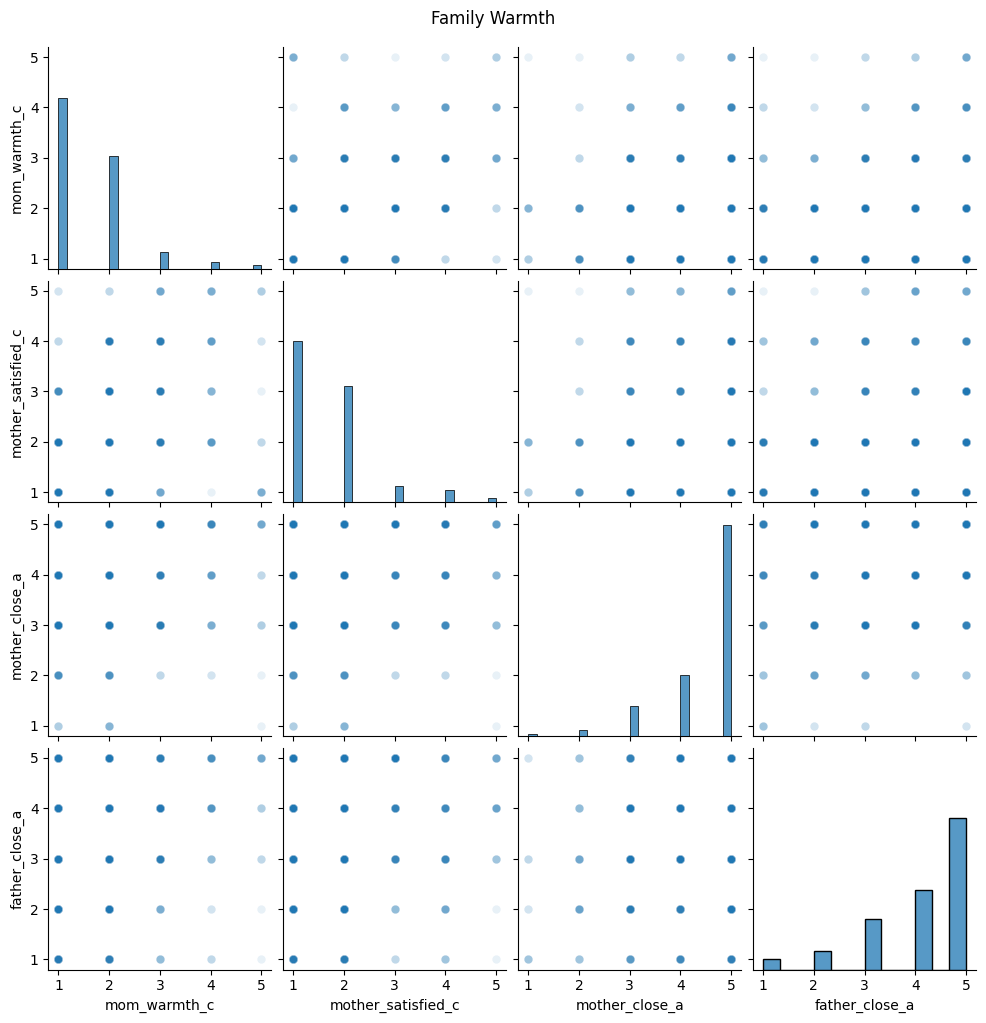

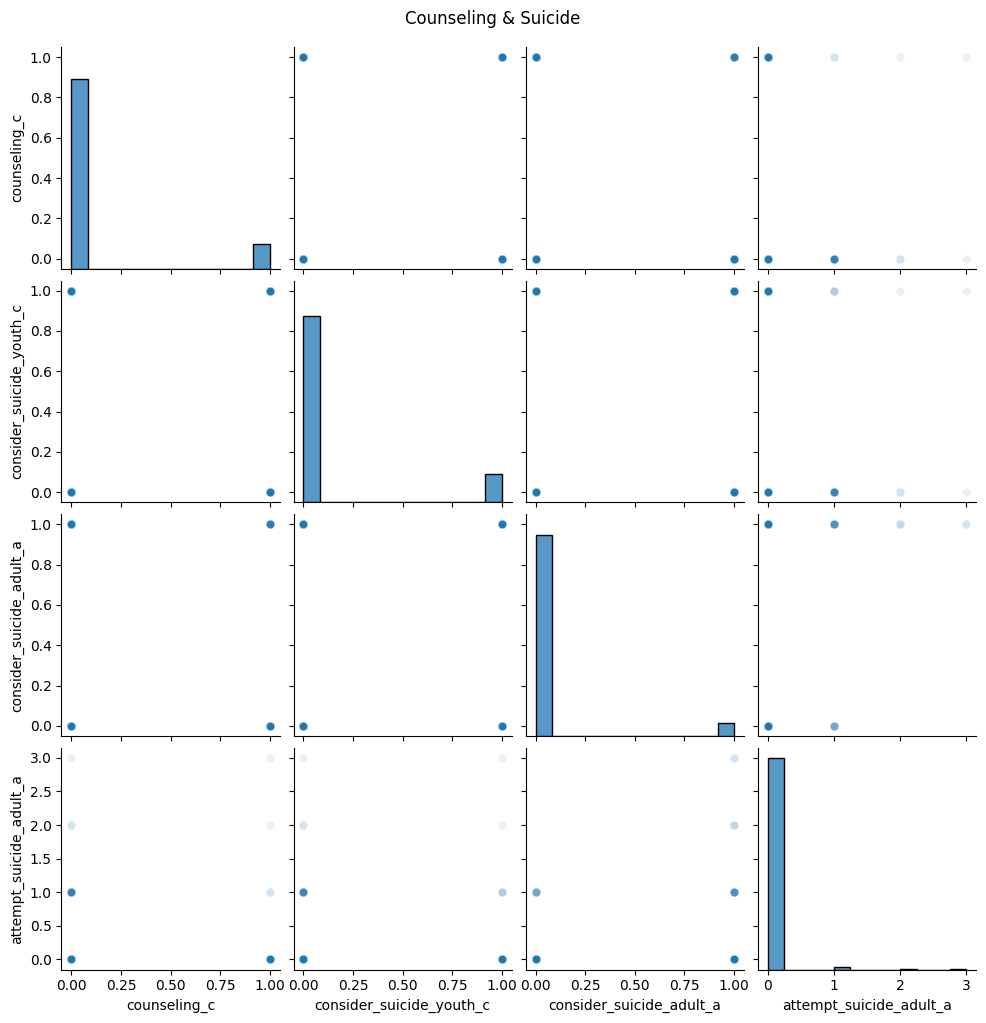

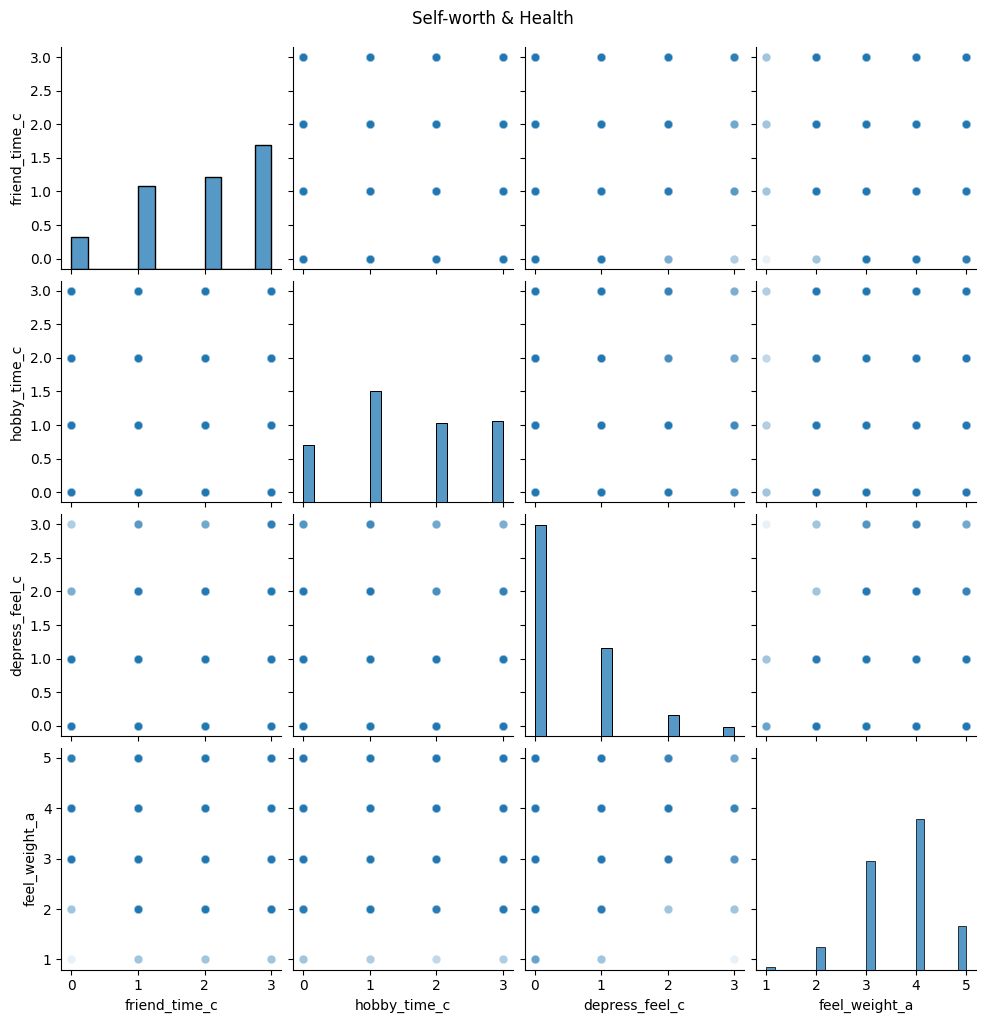

In [13]:
# Childhood Mental Health & Adult Depression
subset_1 = sub_df[['parents_care_c', 'mother_care_c', 'fam_understanding_c', 
                   'depress_feel_c', 'consider_suicide_youth_c', 'depression_a']]

# School Performance & Education
subset_2 = sub_df[['English_c', 'Math_c', 'History_c', 'Science_c', 'desired_edu_a', 'edu_exp_a']]

# Violence
subset_3 = sub_df[['witness_violence_c', 'jumped_c', 'arrest_i_a', 'respon_interfer_a']]

# Family Warmth
subset_4 = sub_df[['mom_warmth_c', 'mother_satisfied_c', 'mother_close_a', 'father_close_a']]

# Counseling & Suicide
subset_5 = sub_df[['counseling_c', 'consider_suicide_youth_c', 
                   'consider_suicide_adult_a', 'attempt_suicide_adult_a']]

# Self-worth & health
subset_6 = sub_df[['friend_time_c', 'hobby_time_c', 'depress_feel_c', 'feel_weight_a']]

g1 = sns.pairplot(subset_1, plot_kws={'alpha': 0.1})
g1.figure.suptitle("Childhood Mental Health & Adult Depression", y=1.02)

# School Performance & Education
g2 = sns.pairplot(subset_2, plot_kws={'alpha': 0.1})
g2.figure.suptitle("School Performance & Education", y=1.02)

# Violence
g3 = sns.pairplot(subset_3, plot_kws={'alpha': 0.1})
g3.figure.suptitle("Violence", y=1.02)

# Family Warmth
g4 = sns.pairplot(subset_4, plot_kws={'alpha': 0.1})
g4.figure.suptitle("Family Warmth", y=1.02)

# Counseling & Suicide
g5 = sns.pairplot(subset_5, plot_kws={'alpha': 0.1})
g5.figure.suptitle("Counseling & Suicide", y=1.02)

# Self-worth & Health
g6 = sns.pairplot(subset_6, plot_kws={'alpha': 0.1})
g6.figure.suptitle("Self-worth & Health", y=1.02)

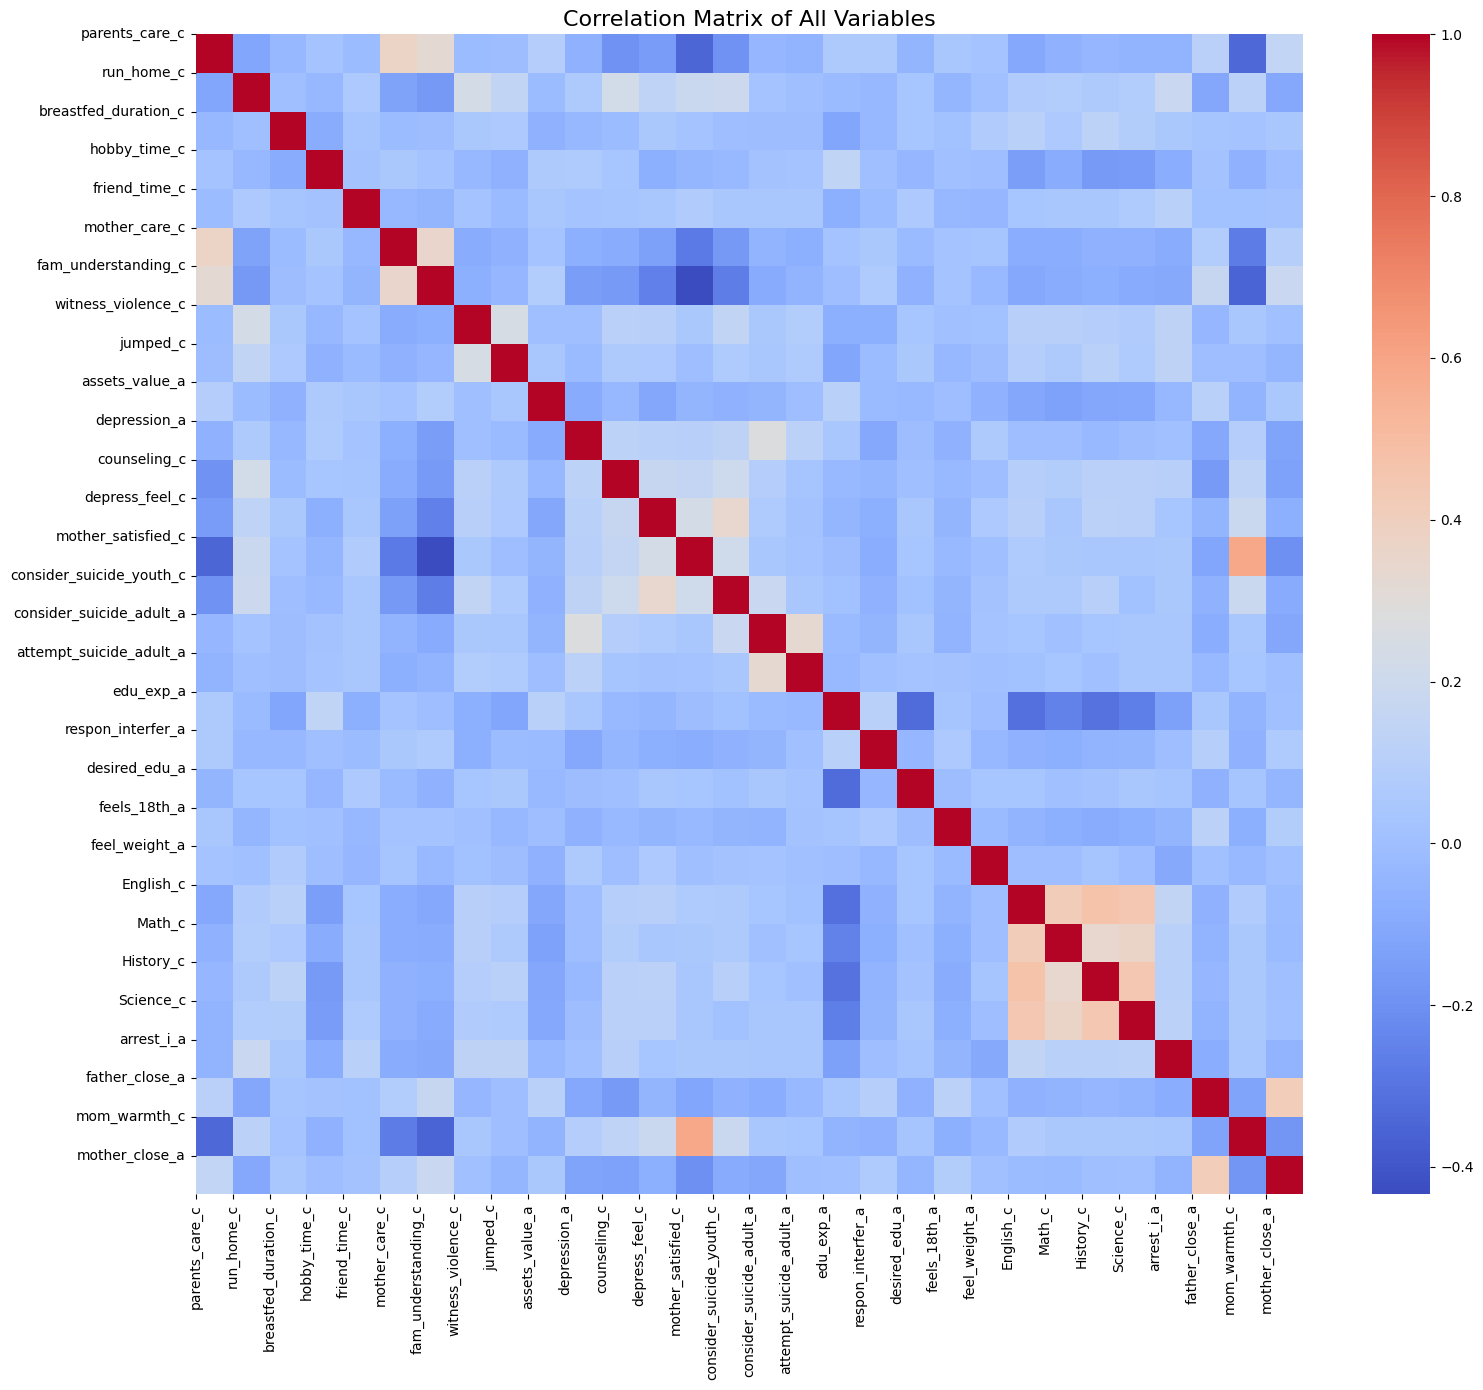

In [14]:
corr_matrix = sub_df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, cmap='coolwarm')

plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr_matrix.index)), labels=corr_matrix.index, rotation=0)

plt.title("Correlation Matrix of All Variables", fontsize=16)
plt.tight_layout()
plt.show()

In [15]:
#Does Higher Levels of parental care are associated with lower levels of depression in adulthood?
Parental_care_X = sub_df['parents_care_c']
Depression_Y = sub_df['depression_a']
sub_df_cleaned = sub_df.dropna(subset=['parents_care_c', 'depression_a'])
correlation, p_value = stats.pearsonr(sub_df_cleaned['parents_care_c'], sub_df_cleaned['depression_a'])
print(f"Correlation between parental care and depression: {correlation:.2f}, p-value: {p_value:.3f}")

Correlation between parental care and depression: -0.06, p-value: 0.013


The Correlation Coefficient value of -0.06 indicates a very weak negative correlation between parental care and depression,suggesting that higher levels of parental care are not strongly associated with lower levels of depression in adulthood.

The p-value of 0.24 indicates that this correlation is not statistically significant at the conventional alpha level of 0.05, meaning we cannot conclude that there is a meaningful relationship between these two variables in this dataset.

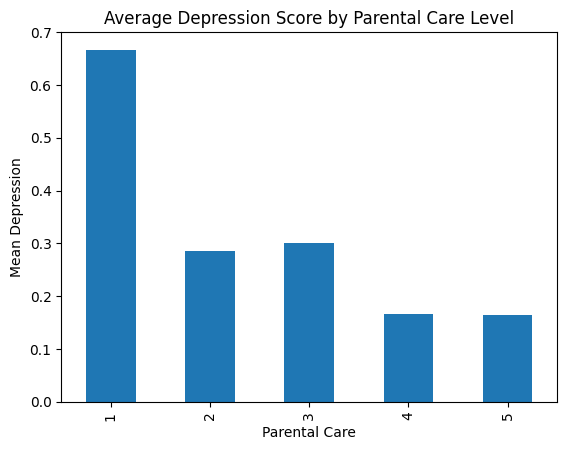

In [16]:
# Plotting the average depression score by parental care level
sub_df_cleaned.groupby('parents_care_c')['depression_a'].mean().plot(kind='bar')
plt.title("Average Depression Score by Parental Care Level")
plt.xlabel("Parental Care")
plt.ylabel("Mean Depression")
plt.show()

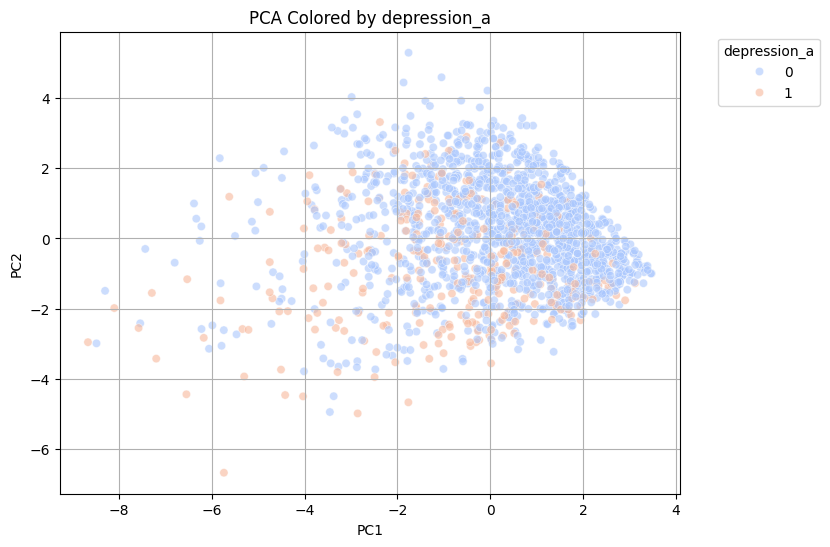

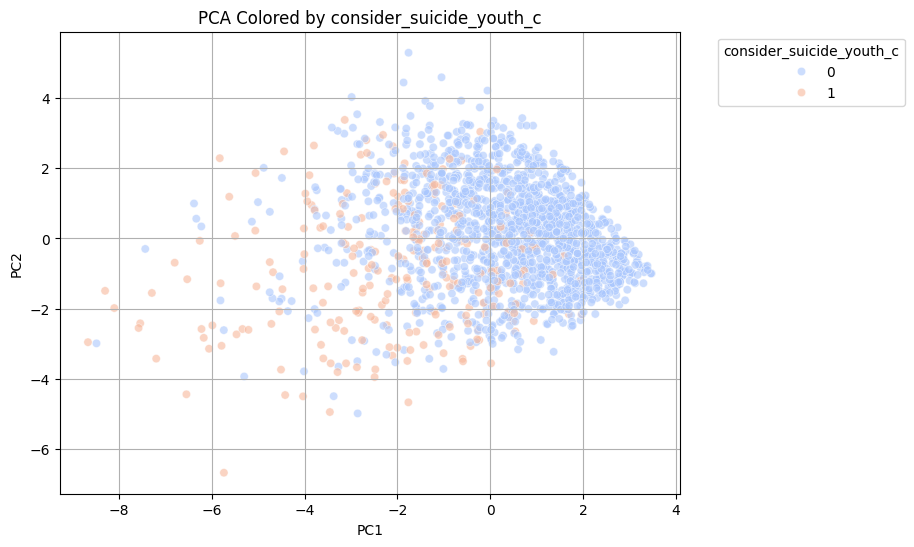

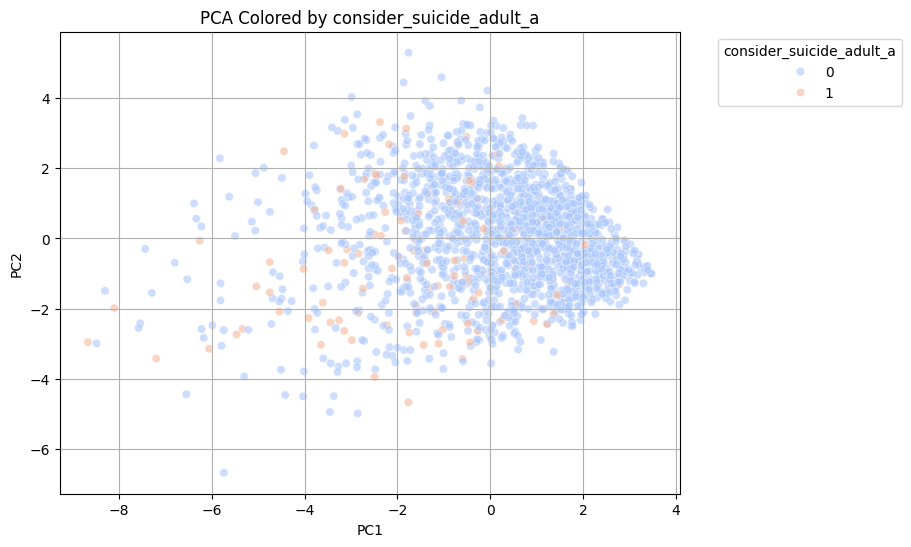

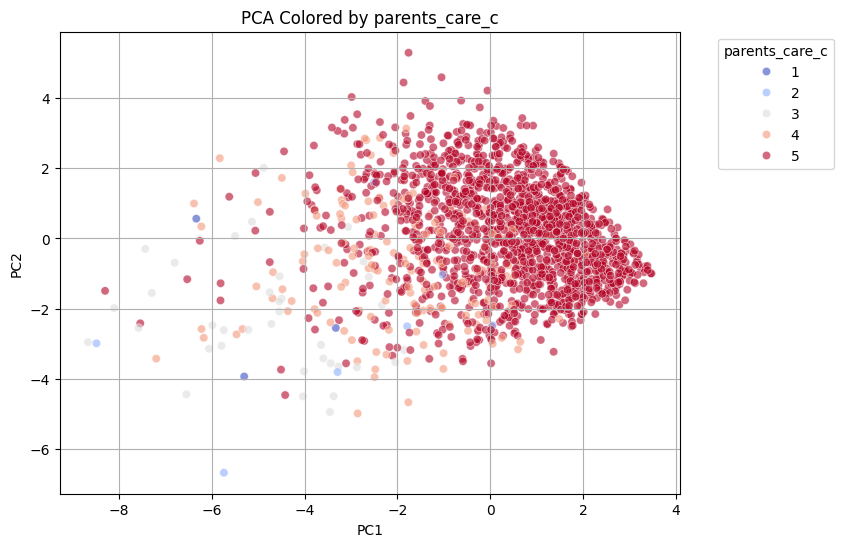

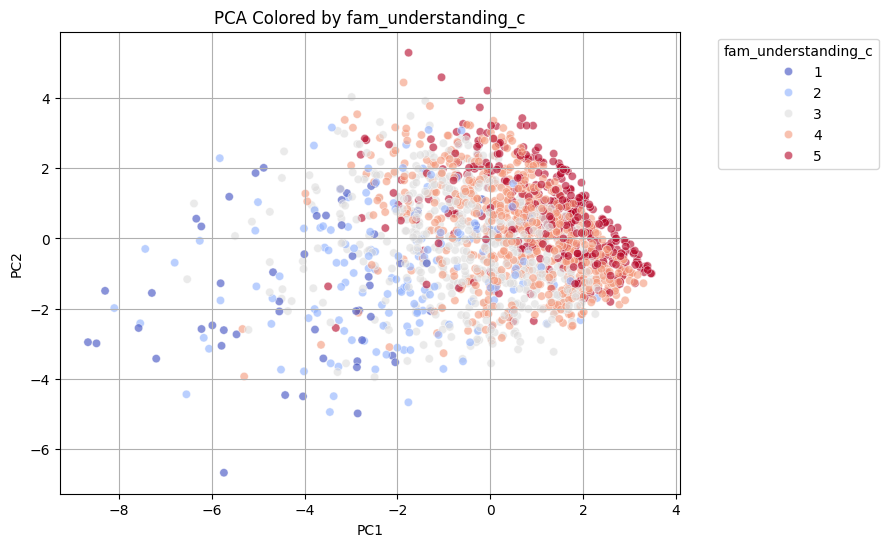

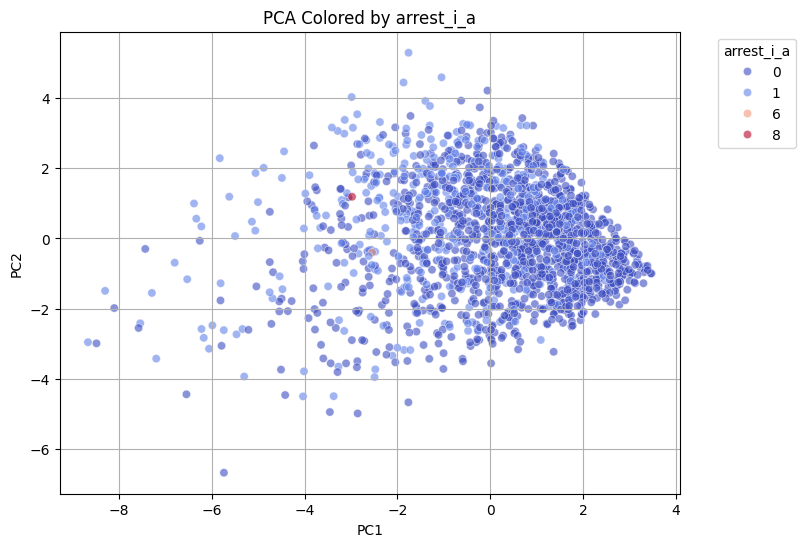

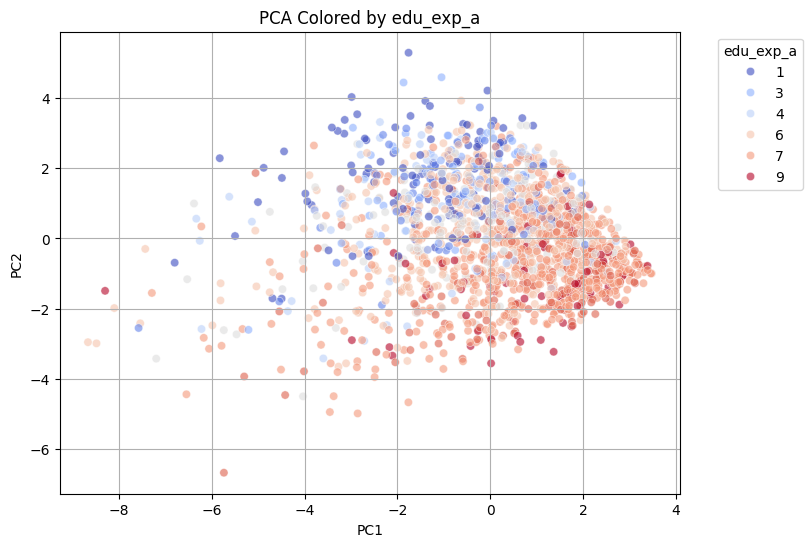

In [17]:
scaler = StandardScaler()
scaled = scaler.fit_transform(sub_df)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

color_vars = ['depression_a', 'consider_suicide_youth_c', 'consider_suicide_adult_a',
              'parents_care_c', 'fam_understanding_c', 'arrest_i_a', 'edu_exp_a']

for var in color_vars:
    mask = sub_df[var].notna()
    color = sub_df.loc[mask, var]
    
    scaled = scaler.fit_transform(sub_df.loc[mask])
    pca_result = pca.fit_transform(scaled)
    
    pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
    pca_df['color'] = color.values
    
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='PC1', y='PC2', hue='color', data=pca_df, palette='coolwarm', alpha=0.6)
    plt.title(f'PCA Colored by {var}')
    plt.grid(True)
    plt.legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

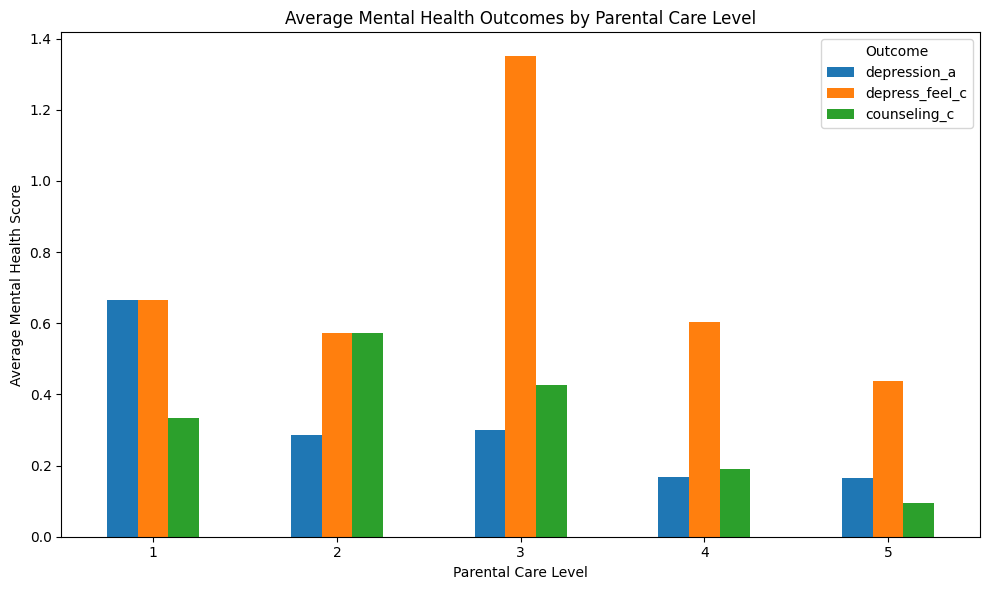

,depression_a,depress_feel_c,counseling_c
parents_care_c,,,
1,0.666667,0.666667,0.333333
2,0.285714,0.571429,0.571429
3,0.300000,1.350000,0.425000
4,0.166667,0.603448,0.189655
5,0.164319,0.437961,0.095909


In [18]:
#sub_df.head(10)
parent_care_depression = sub_df.groupby('parents_care_c')[['depression_a', 'depress_feel_c', 'counseling_c']].mean()
parent_care_depression.plot(kind='bar', figsize=(10, 6))
plt.title('Average Mental Health Outcomes by Parental Care Level')
plt.ylabel('Average Mental Health Score')
plt.xlabel('Parental Care Level')
plt.xticks(rotation=0)
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()
parent_care_depression


# Ethics & Privacy

Our research question raises several ethical and privacy issues at every stage of the data process, including data collection, analysis, and post-analysis communication.

1. **Biases in Data Collection**

    The data we are planning to analyze for this project may disproportionately represent demographic communities. For example, studies that rely on self-reported parental involvement or medical records might exclude populations with limited access to healthcare or different cultural parenting sub_dfs. To lessen these concerns, we will:
   - Use diverse, representative datasets that encompass an extensive range of socioeconomic, cultural, and racial backgrounds
   - Conduct a thorough review of the datasets to eliminate any biases
   - Perform statistical analysis to check for sampling biases

2. **Privacy Concerns**

    The characteristics of the data, usually including sensitive information about parental sub_dfs and health outcomes, pose notable risks to privacy. To address this issue:
   - Prioritize the use of anonymized data to ensure no individual can be identified
   - Adhere to strict data privacy sub_dfs, including encryption, restricted access, and compliance with data privacy regulations
   - Communicate privacy protection protocols to all group members

3. **Biases in Analysis**

    Framing parental involvement as a changeable variable could unintentionally disclose cultural or societal biases about gender roles. Also, our analysis could overemphasize some correlations while ignoring confounding variables. To mitigate this:
   - Perform subgroup analyses to understand impacts across gender, race, and SES
   - Control for confounders such as maternal involvement, SES, and healthcare access
   - Apply ethical and statistical techniques to reduce model bias

4. **Post-Analysis Communication**

    Misinterpretation of results could reinforce stereotypes or social inequalities. To prevent this, we will:
   - Transparently report limitations and biases
   - Include insights from underrepresented groups to ensure balanced conclusions
   - Distribute findings in an accessible and culturally respectful manner

By identifying and addressing these issues, we aim to ensure that our analysis maintains integrity and promotes equitable data use.

# Team Expectations 


**Communication:**  
The team will utilize Discord for daily communication, and each member is expected to respond by the end of the day if not earlier. The group should be informed as soon as possible if a member expects to be unavailable for more than 24 hours. The tone of the messages should be blunt but polite, and there should always be an effort to be proactive rather than reactive. In case of conflicts, team members should act respectfully and be understanding, stepping away from the conversation if needed, and resolving the issues constructively.

**Meetings and Collaboration:**  
The team will meet once a week in person to be able to encourage collaboration and creativity, and the current schedule is listed below. To make the meetings efficient, it is encouraged to complete the items in the “Completed Before Meeting” section before attending and come prepared with future plans to discuss. All decisions should be made with a majority vote, and re-voting based on any ties. If a decision needs to be made quickly and a member is unable to respond, it will be made by the remaining majority or based on the best judgment of the member handling the problem.

**Task Assignments:**  
As it is expected that everyone will contribute equally, tasks will be assigned to volunteers first, with the remaining tasks being assigned to whoever has the least amount of work. We will use our shared Google Docs and Discord to keep track of our overall progress. Although deadlines and regular check-ins will be scheduled for each component, if a member is struggling with their task, the team should be notified immediately. They can then be paired with another member, or the task will be worked on as a group to complete it in a timely manner, with resources being provided to promote a positive learning and working environment. If a team member is consistently not completing their work, we will first notify them by email, outlining our expectations, before conversing with the TA/IA after 24 hours for next steps and reallocating their work.

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5/4  |  2 PM | Do more background research on the topic & further analyze the dataset  | Discuss possible variables to consider; assign parts to group members | 
| 5/10  |  1 PM |  Import & start wrangling the data | Decide focus variables and how to revise the hypothesis & research question; discuss analytical approaches | 
| 5/15  | 1 PM  | Data wrangling & EDA considerations  | Revise wrangling & discuss analysis plans   |
| 5/18  | 2 PM  | Finalize wrangling & begin analysis | Discuss/edit analysis and assign components to members   |
| 5/24  | 1 PM  | Continue analysis & EDA | Plan to finish by the deadline and discuss the observations found |
| 6/1  | 2 PM  | Further revision of the project | Check in with each other & extra discussion |
| 6/5  | 1 PM  | Final revisions of the project | Work to record the final presentation |
| 6/13  | Before Midnight  | Individual assignments | Turn in Final Project & Team Evaluation Surveys |